## Linear Regression

In [1]:
import os
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib

weight = 0.7
bias = 0.3

start = 0
end = 10
step = 0.2

x = torch.arange(start, end, step).unsqueeze(dim=1)

In [2]:
y = weight * x + bias

In [3]:
print(len(x), len(y))

50 50


In [4]:
train_data = int(0.8 * len(x))

In [5]:
train_data

40

In [6]:
x_train, y_train, x_test, y_test = x[:train_data], y[:train_data], x[train_data:], y[train_data:]

In [7]:
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Build Model

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method is defined the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input training data
        return self.weights * x + self.bias

* torch.nn.Parameter: What parameters model try and learn
* torch.optim: Where all optimizers are
* def forward(self): must to write as subclass it will tell what happen in future

In [9]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()

In [10]:
model_1.parameters()

<generator object Module.parameters at 0x000002142DCF6340>

In [11]:
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
x_test, y_test

(tensor([[8.0000],
         [8.2000],
         [8.4000],
         [8.6000],
         [8.8000],
         [9.0000],
         [9.2000],
         [9.4000],
         [9.6000],
         [9.8000]]),
 tensor([[5.9000],
         [6.0400],
         [6.1800],
         [6.3200],
         [6.4600],
         [6.6000],
         [6.7400],
         [6.8800],
         [7.0200],
         [7.1600]]))

In [14]:
with torch.inference_mode():
    y_preds = model_1(x_test)

In [15]:
y_test, y_preds

(tensor([[5.9000],
         [6.0400],
         [6.1800],
         [6.3200],
         [6.4600],
         [6.6000],
         [6.7400],
         [6.8800],
         [7.0200],
         [7.1600]]),
 tensor([[2.8223],
         [2.8897],
         [2.9570],
         [3.0243],
         [3.0917],
         [3.1590],
         [3.2264],
         [3.2937],
         [3.3610],
         [3.4284]]))

* **Loss Function:** A function measure how wrong your model is lower is better
* **Optimizer:** Take into account the loss of model and adjusts the models parameters(eg. Weight & Bias) to improve loss

* In Pytorch we nedd training loop and testing loop

In [16]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

* Building Training loop in pytorch

1. Loop through a data
2. Forward pass to make prediction
3. Calcuate Loss
4. Optimize zero grad
5. Loss Backward - (**Backpropogation**)
6. Optimizer step - use the optimizer to adjust weights - (**Gradient Descent**) - Change in x w.r.t y (slope)

In [19]:
# Epoch is one loop through data
epochs = 50
test_loss_list = list()
for epoch in range(epochs):
    # Train Mode
    model_1.train()
    # Forward pass
    y_pred = model_1(x_train)
    loss = loss_fn(y_pred, y_train) # if regresion then Difference (|y_pred - y_test|)
    print("loss:", loss)
    # optimizer 
    optimizer.zero_grad() # If we didn't make it zero then and go throuh the loop then then it will increment by 1 as we are running things through loops
    # Backpropogation
    loss.backward()
    # step optimizer
    optimizer.step()
    print("Weights and bias: ", model_1.state_dict())

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred,  y_test)

    if epoch % 5 == 0:
        test_loss_list.append(test_loss)

    print(f"Epoch: {epoch}, | Loss: {test_loss}")
    

loss: tensor(1.5881, grad_fn=<MeanBackward0>)
Weights and bias:  OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.1388]))])
Epoch: 0, | Loss: 3.047546148300171
loss: tensor(1.4260, grad_fn=<MeanBackward0>)
Weights and bias:  OrderedDict([('weights', tensor([0.4147])), ('bias', tensor([0.1488]))])
Epoch: 1, | Loss: 2.690446376800537
loss: tensor(1.2639, grad_fn=<MeanBackward0>)
Weights and bias:  OrderedDict([('weights', tensor([0.4537])), ('bias', tensor([0.1588]))])
Epoch: 2, | Loss: 2.333346128463745
loss: tensor(1.1018, grad_fn=<MeanBackward0>)
Weights and bias:  OrderedDict([('weights', tensor([0.4927])), ('bias', tensor([0.1688]))])
Epoch: 3, | Loss: 1.9762461185455322
loss: tensor(0.9397, grad_fn=<MeanBackward0>)
Weights and bias:  OrderedDict([('weights', tensor([0.5317])), ('bias', tensor([0.1788]))])
Epoch: 4, | Loss: 1.6191461086273193
loss: tensor(0.7776, grad_fn=<MeanBackward0>)
Weights and bias:  OrderedDict([('weights', tensor([0.5707])), ('bias', tensor([0.

In [20]:
test_loss_list

[tensor(3.0475),
 tensor(1.2620),
 tensor(0.1028),
 tensor(0.3198),
 tensor(0.0176),
 tensor(0.2508),
 tensor(0.0564),
 tensor(0.3194),
 tensor(0.0188),
 tensor(0.3466)]

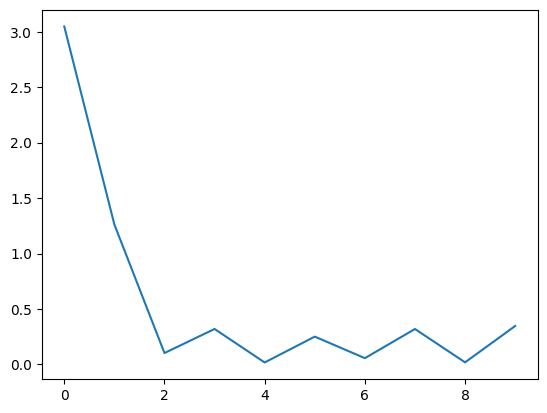

In [21]:
plt.plot(np.array(torch.tensor(test_loss_list).cpu().numpy()))

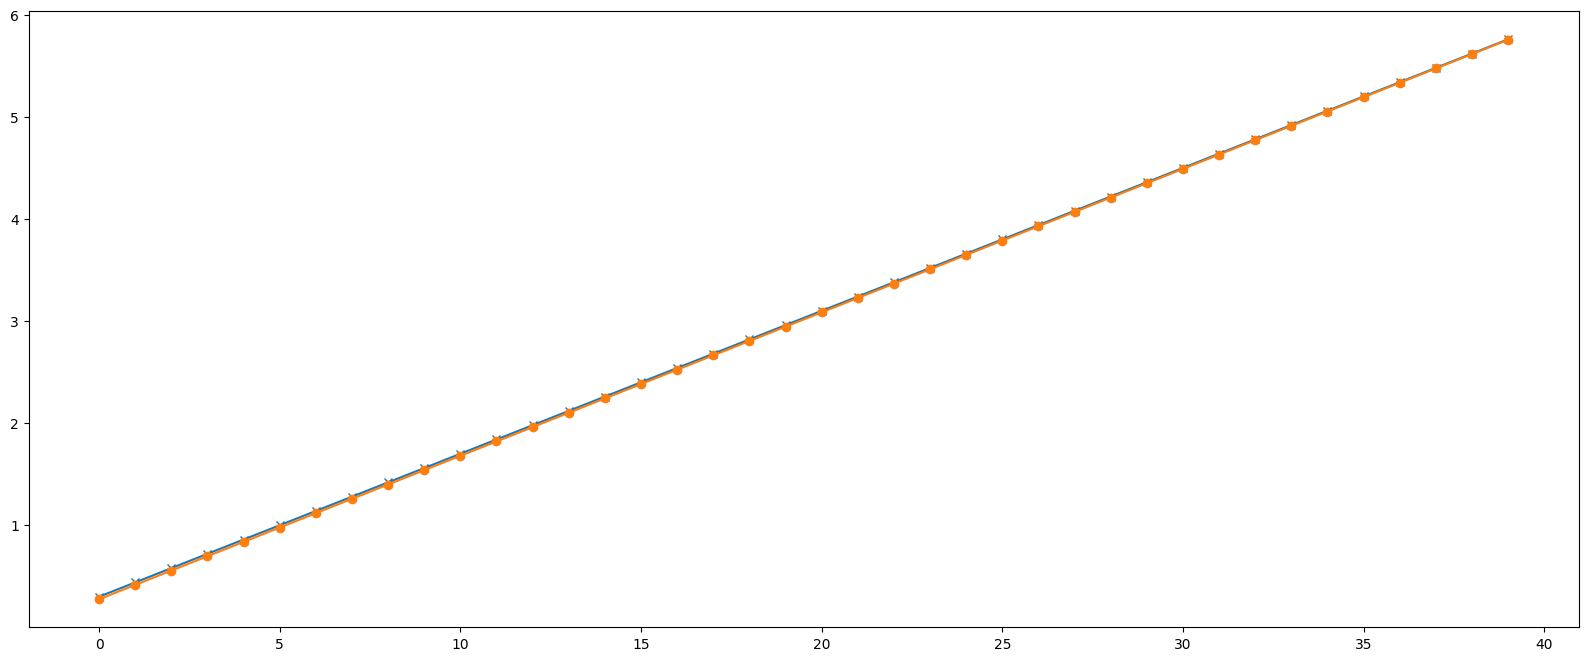

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(y_train, marker='x')
values = y_pred.detach().numpy()

# Plotting
plt.plot(values, marker='o')
plt.show()

In [23]:
MODEL_PATH = pathlib.Path("models/Torch_1")
MODEL_WEIGHT_PATH = pathlib.Path("models/Torch_1/weights")
MODEL_WEIGHT_PATH.mkdir(parents=True, exist_ok=True)
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "LinearRegressionModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_WEIGHT_SAVE_PATH = MODEL_WEIGHT_PATH / MODEL_NAME

In [24]:
MODEL_WEIGHT_SAVE_PATH

WindowsPath('models/Torch_1/weights/LinearRegressionModel.pth')

In [25]:
torch.save(obj=model_1.state_dict(), f=MODEL_WEIGHT_SAVE_PATH)

In [26]:
torch.save(obj=model_1, f = MODEL_SAVE_PATH)

In [27]:
# Model with state dict - We have to create new instance of class of model and loade the dict into it
model_2 = LinearRegressionModel()
model_2.load_state_dict(torch.load(f=MODEL_WEIGHT_SAVE_PATH))

<All keys matched successfully>

In [28]:
model_2.state_dict()

OrderedDict([('weights', tensor([0.7416])), ('bias', tensor([0.2848]))])

In [29]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.7416])), ('bias', tensor([0.2848]))])

In [30]:
model_2.eval()
with torch.inference_mode():
    y_pred_model_2 = model_2(x_test)

In [31]:
test_pred == y_pred_model_2

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [32]:
model_3 = torch.load(f=MODEL_SAVE_PATH)

In [33]:
model_3.eval()
with torch.inference_mode():
    model_3_preds = model_3(x_test)

In [34]:
test_pred == model_3_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [35]:
# Rerun